
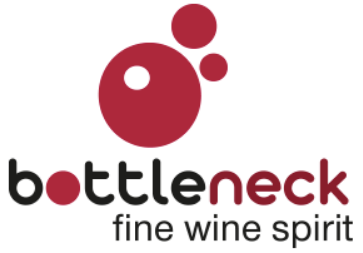

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
pip install httpx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install selectolax


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.6 MB/s eta 0:00:00


In [ ]:
import httpx
from selectolax.parser import HTMLParser

In [ ]:
#Importation complète des librairies
import pandas as pd
import numpy as np
import plotly.express as px
import chardet
import importlib.metadata
import missingno as msno
import matplotlib.pyplot as plt
import warnings



In [ ]:
#importation partielle des librairies
from scipy import stats

In [ ]:
#Affichage des versions pythons et de chaque librairie
!python --version
# Version des bibliothèques utilisées (standard)
print('\n'.join(f'{m.__name__} - {m.__version__}'
                for m in globals().values()
                if getattr(m, '__version__', None)))
# Version des bibliothèques utilisées (import non complet)
print("scipy - ", importlib.metadata.version('scipy'))

Python 3.10.12
httpx - 0.27.0
pandas - 2.0.3
numpy - 1.25.2
chardet - 5.2.0
missingno - 0.5.2
scipy -  1.11.4


##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

In [ ]:
#Identification de l'encodage du fichier
with open("caracteristiques_vins.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "Windows-1252"
#Utilisons Pandas pour charger le fichier
df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Création des fonctions</h3>
</div>

In [ ]:
def delete_columns_with_no_value(df_input):
    columns_to_delete = []
    for col in df_input.columns:
        if len(df_input[col].unique()) <= 1:
            columns_to_delete.append(col)
            print(col)
    df_input.drop(columns=columns_to_delete, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [ ]:
#Consulter les dimensions du dataset
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [ ]:
#Afficher les 5 premières et dernières lignes de la table
display(df_erp.head())
display(df_erp.tail())

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


,product_id,onsale_web,price,stock_quantity,stock_status
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock
824,7338,1,16.3,45,instock


In [ ]:
#Vérifier si il y a des lignes en doublons dans la colonne product_id
print(df_erp['product_id'].nunique())

825


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()

array(['outofstock', 'instock'], dtype=object)

La valeur de la colonne 'stock_status' est lié à la valeur de la colonne 'stock_quantity'.

In [ ]:
#Création d'une colonne "stock_status_2"
df_erp['stock_status_2']=0
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp.loc[df_erp['stock_quantity']<1,'stock_status_2']="outofstock"
df_erp.loc[df_erp['stock_quantity']>=1,'stock_status_2' ]="instock"
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
df_erp['stock_status'] == df_erp['stock_status_2']
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 825 qui correspond au nombre de lignes dans ce dataset
print(sum(df_erp['stock_status'] == df_erp['stock_status_2']))

824


In [ ]:
#Si les colonnes ne sont pas toutes absolument identiques ligne à ligne alors identifier la ligne en écart
df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
443,4954,1,25.0,0,instock,outofstock


In [ ]:
#Correction de la ou les données incohérentes
df_erp.loc[df_erp['product_id']==4954,'stock_status']='outofstock'

In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   stock_status_2  825 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 38.8+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

###<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
negatif_ou_nul = df_erp.query("price <=0")
print(negatif_ou_nul)

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, stock_status_2]
Index: []


In [ ]:
#Affichage des prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].count()-len(df_erp)))

Nombres d'article avec un prix non renseignés: 0


In [ ]:
#Affichage des informations de la colonne "price"
print(df_erp['price'].describe())

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64


###<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################
#Vérification de la colonne stock quantity
df_erp['stock_quantity'].info()
#comprendre pourquoi il y des stock quantity nul
#Afficher la quantité minimum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].min())
#Afficher la quantité maximum de la colonne "stock_quantity"
print(df_erp['stock_quantity'].max())

<class 'pandas.core.series.Series'>
RangeIndex: 825 entries, 0 to 824
Series name: stock_quantity
Non-Null Count  Dtype
--------------  -----
825 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB
0
578


###<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient
df_erp['onsale_web'].unique()

array([1, 0])

In [ ]:
display(df_erp.loc[df_erp['onsale_web']<1])

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
19,4055,0,86.1,0,outofstock,outofstock
49,4090,0,73.0,0,outofstock,outofstock
50,4092,0,47.0,0,outofstock,outofstock
119,4195,0,14.1,0,outofstock,outofstock
131,4209,0,73.5,0,outofstock,outofstock
...,...,...,...,...,...,...
818,7200,0,31.0,6,instock,instock
819,7201,0,31.0,18,instock,instock
820,7203,0,45.0,30,instock,instock
821,7204,0,45.0,9,instock,instock


On comprend que cette colonne qui signifient si le vin est mis en vente en ligne ou non (1=oui 0=non).

In [ ]:
#Suppression les colonnes comportant le libellé "stock_status"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp.drop('stock_status',axis=1,inplace=True)
df_erp.drop('stock_status_2',axis=1,inplace=True)

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [ ]:
#Dimension du dataset
df_web.info()
display(df_web.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Axes(0.125,0.11;0.775x0.77)


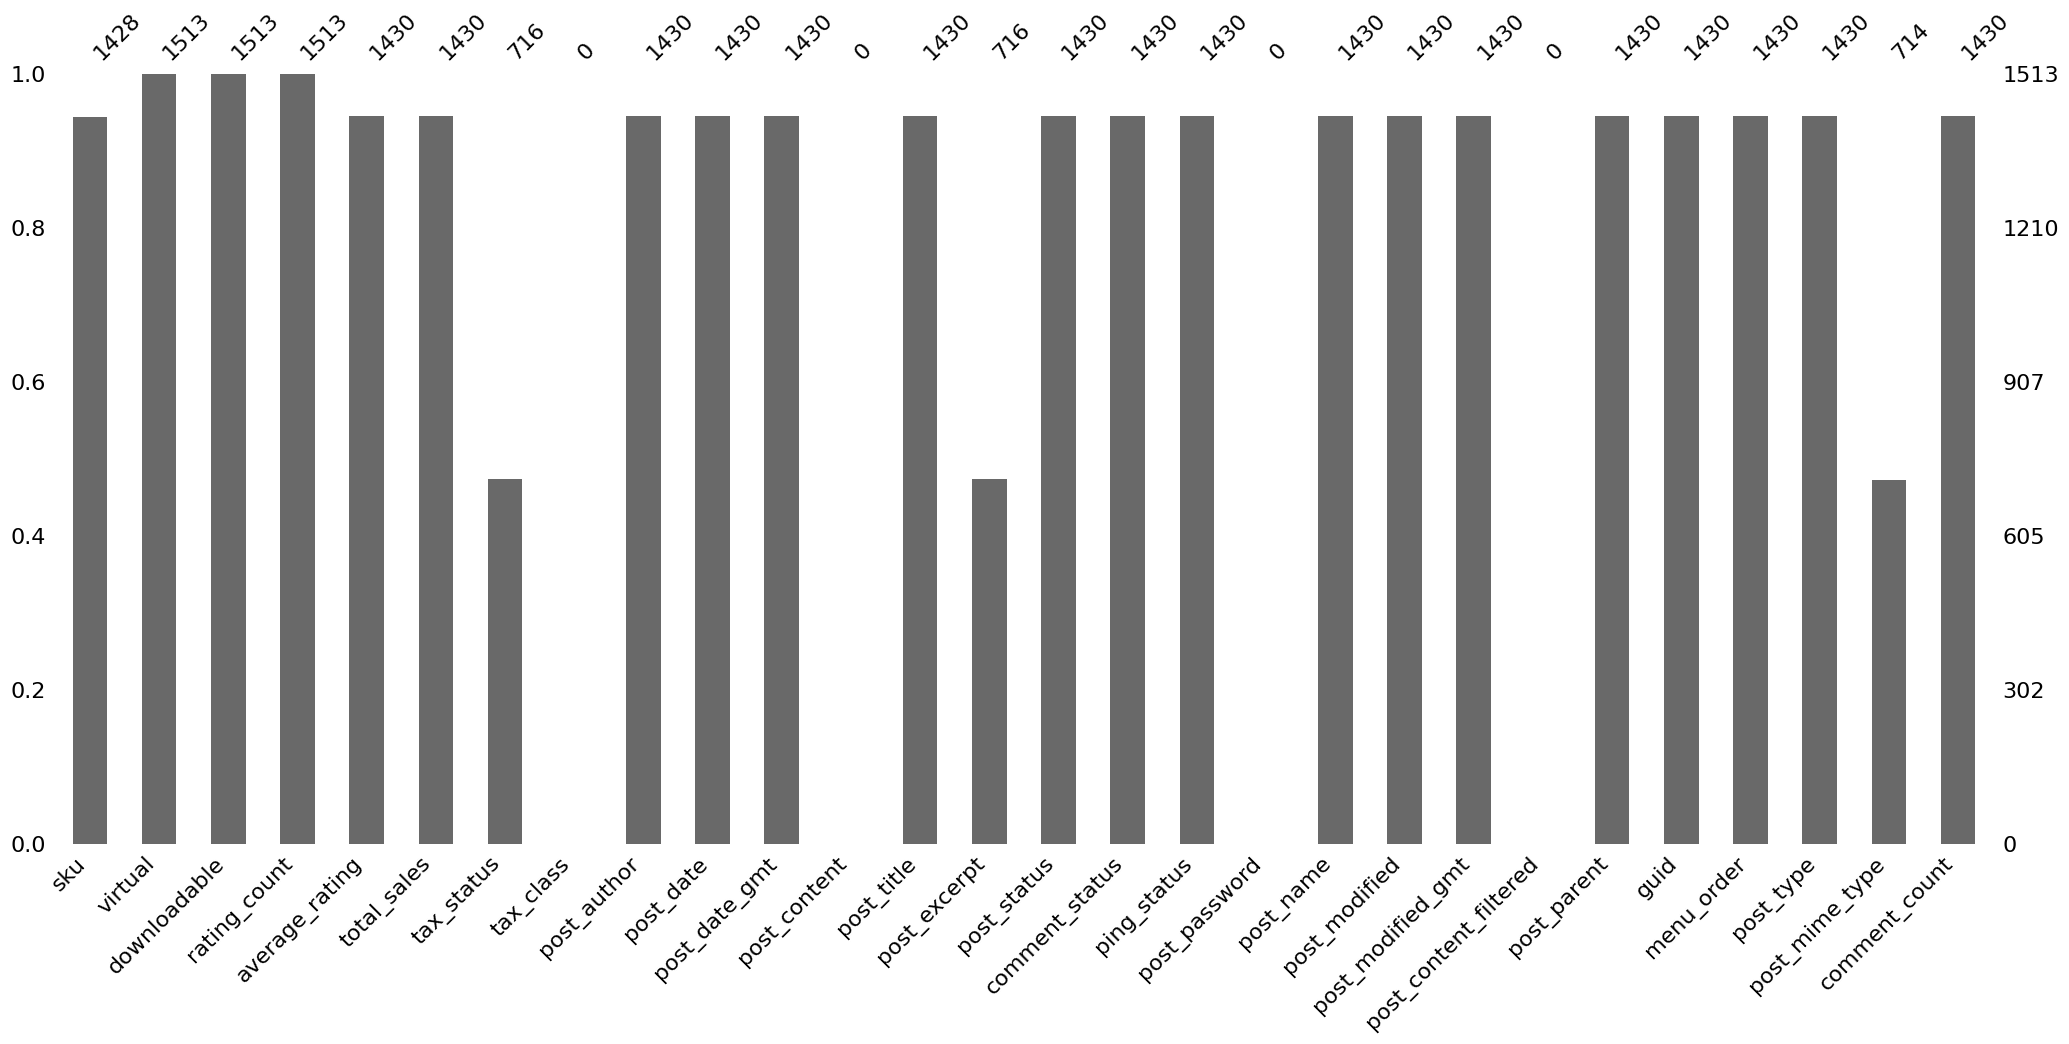

In [ ]:
#on voit plusieurs irrégularitées au niveau des données de ce dataset,notamment un grand nombre de valeurs nulles, on le représente visuellement.
print(msno.bar(df_web.sample(1513)))

In [ ]:
#Nous voyons que nous avons plusieurs colonnes vides ou avec une seule valeur,supprimons les:
delete_columns_with_no_value(df_web)

virtual
downloadable
rating_count
tax_class
post_content
post_password
post_content_filtered


In [ ]:
#Identification des lignes sans code articles
df_web[df_web['sku'].isna()]

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_non=df_web[df_web['sku'].isna()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_non.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 178 to 796
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   average_rating     2 non-null      float64       
 2   total_sales        2 non-null      float64       
 3   tax_status         2 non-null      object        
 4   post_author        2 non-null      float64       
 5   post_date          2 non-null      datetime64[ns]
 6   post_date_gmt      2 non-null      datetime64[ns]
 7   post_title         2 non-null      object        
 8   post_excerpt       2 non-null      object        
 9   post_status        2 non-null      object        
 10  comment_status     2 non-null      object        
 11  ping_status        2 non-null      object        
 12  post_name          2 non-null      object        
 13  post_modified      2 non-null      datetime64[ns]
 14  post_modified_

In [ ]:
df_web.dropna(subset=['sku'], inplace=True)

In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web['sku'].nunique()

714

In [ ]:
#il semble que tous les sku ont un doublon, essayoons d'en trouver la cause avec un test
print(df_web[df_web['sku']== 15298])

       sku  average_rating  total_sales tax_status  post_author  \
1    15298             0.0          6.0    taxable          2.0   
799  15298             0.0          6.0        NaN          2.0   

              post_date       post_date_gmt  \
1   2018-02-08 12:58:52 2018-02-08 11:58:52   
799 2018-02-08 12:58:52 2018-02-08 11:58:52   

                                      post_title  \
1    Pierre Jean Villa Saint-Joseph Préface 2018   
799  Pierre Jean Villa Saint-Joseph Préface 2018   

                                          post_excerpt post_status  \
1    Il exhale un nez subtil, racé avec du poivre f...     publish   
799                                                NaN     publish   

    comment_status ping_status                                    post_name  \
1           closed      closed  pierre-jean-villa-saint-joseph-preface-2018   
799         closed      closed  pierre-jean-villa-saint-joseph-preface-2018   

          post_modified   post_modified_gmt  post_

In [ ]:
#on se rend compte qu'à chaque input dans le dataset, chaque bouteille est inscrit deux fois avec un post type "product" et "attachement"
df_web.drop(df_web.loc[df_web["post_type"] == "attachment"].index, inplace=True)

Axes(0.125,0.11;0.775x0.77)


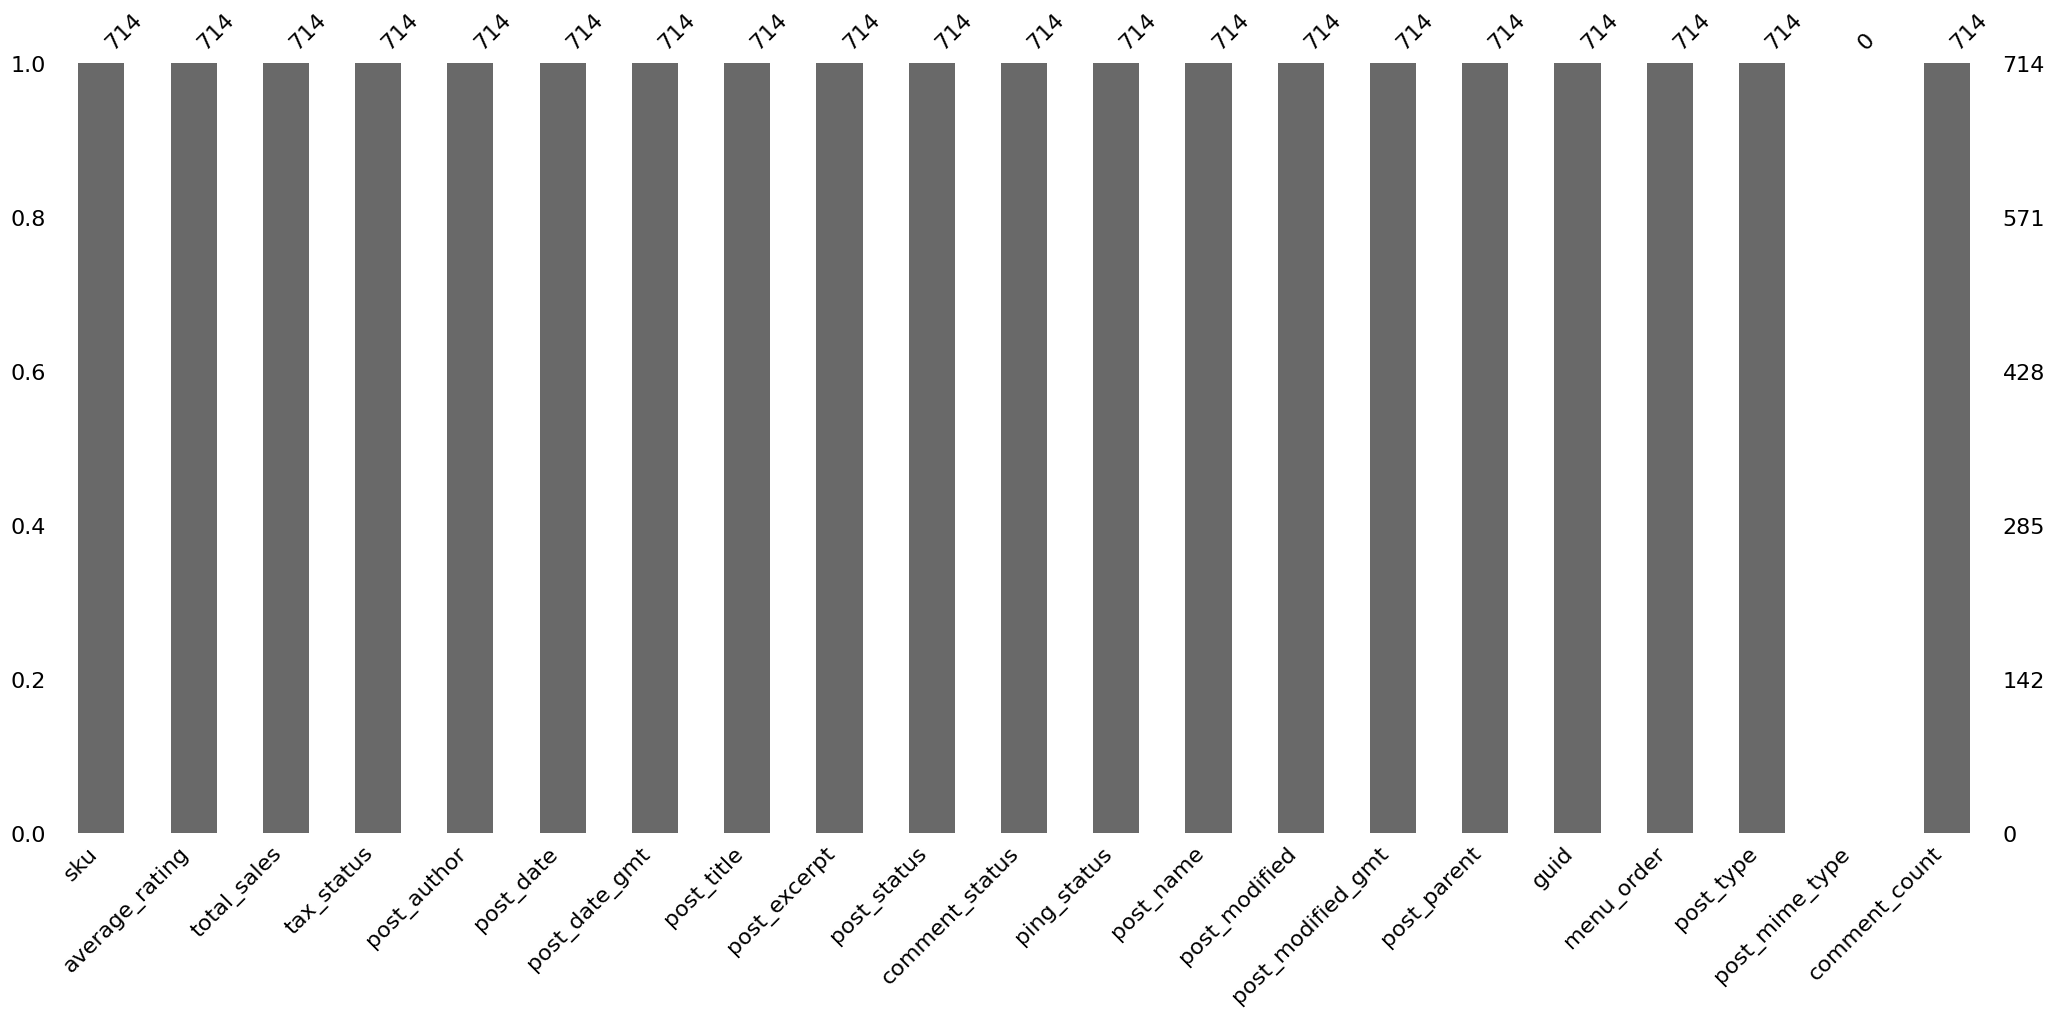

In [ ]:
#revérification des valeurs des colonnes.
print(msno.bar(df_web.sample(714)))

In [ ]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la règle de codification?
print(df_web.loc[df_web['sku'].astype('str').str.len()!=5]['sku'].unique())

['bon-cadeau-25-euros' 304 1662 1360 1364 7086 1366 6616 7818 4679 9562
 9636 3506 3510 3507 7819 3509 812 807 805 802 2534 793 791 2179 804 41
 798 2361 38 5646 8344 3568 9937 531 3383 8463 8365 7033 523 7032 8193
 '13127-1']


In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web[df_web['sku'].astype('str').str.len()!=5]

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
70,304,0.0,40.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",publish,closed,closed,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
72,1662,0.0,87.0,taxable,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",publish,closed,closed,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
73,1360,0.0,0.0,taxable,2.0,2018-02-13 13:26:34,2018-02-13 12:26:34,Champagne Mailly Grand Cru Brut Réserve,"Un oeil jaune d’or iridescent, un nez épanoui ...",publish,closed,closed,champagne-mailly-gc-brut-reserve,2020-08-26 18:05:02,2020-08-26 16:05:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
75,1364,0.0,0.0,taxable,2.0,2018-02-13 13:36:44,2018-02-13 12:36:44,Champagne Mailly Grand Cru Brut Rosé,Une somptueuse robe rose lumineuse habille cet...,publish,closed,closed,champagne-mailly-grand-cru-brut-rose,2020-08-08 10:45:03,2020-08-08 08:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
76,7086,0.0,0.0,taxable,2.0,2018-02-13 13:41:05,2018-02-13 12:41:05,Champagne Mailly Grand Cru Intemporelle Rosé 2009,"Au regard, la robe d’un rose saumoné clair et ...",publish,closed,closed,champagne-mailly-grand-cru-intemporelle-rose-2009,2020-08-20 09:30:19,2020-08-20 07:30:19,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
77,1366,0.0,1.0,taxable,2.0,2018-02-13 13:45:31,2018-02-13 12:45:31,Champagne Mailly Grand Cru Intemporelle 2010,"A l’œil, la robe brillante séduit par sa belle...",publish,closed,closed,champagne-mailly-grand-cru-intemporelle-2010,2020-08-26 18:05:02,2020-08-26 16:05:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
158,6616,0.0,0.0,taxable,2.0,2018-02-20 15:10:17,2018-02-20 14:10:17,Domaine Huet Vouvray Le Clos du Bourg Moelleux...,"D’une robe claire et brillante, les larmes de ...",publish,closed,closed,domaine-huet-vouvray-le-clos-du-bourg-moelleux...,2020-07-25 10:55:03,2020-07-25 08:55:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
197,7818,0.0,96.0,taxable,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,publish,closed,closed,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
199,4679,0.0,0.0,taxable,2.0,2018-03-01 14:19:24,2018-03-01 13:19:24,Champagne Mailly Grand Cru Les Echansons 2007,<blockquote>Ce vin s'habille d'une parure fest...,publish,closed,closed,champagne-mailly-grand-cru-les-echansons-2007,2020-07-08 17:35:03,2020-07-08 15:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
#Pour les codes articles identifiés, nous comblons avec des zéros les sku inférieurs à 5 chiffres afin de pouvoir les retrouvés.
df_web['sku']=df_web['sku'].astype('str').str.zfill(5)

In [ ]:
#test avec le sku 7032
display(df_web[df_web['sku']=='07032'])

,sku,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
689,07032,0.0,0.0,taxable,2.0,2019-07-26 10:27:08,2019-07-26 08:27:08,Planeta Sicilia Passito di Noto 2016,"Obtenu à partir de Moscato Sicilien, la vendan...",publish,closed,closed,planeta-sicilia-passito-di-noto-2016,2020-06-27 14:25:03,2020-06-27 12:25:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 798
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   average_rating     714 non-null    float64       
 2   total_sales        714 non-null    float64       
 3   tax_status         714 non-null    object        
 4   post_author        714 non-null    float64       
 5   post_date          714 non-null    datetime64[ns]
 6   post_date_gmt      714 non-null    datetime64[ns]
 7   post_title         714 non-null    object        
 8   post_excerpt       714 non-null    object        
 9   post_status        714 non-null    object        
 10  comment_status     714 non-null    object        
 11  ping_status        714 non-null    object        
 12  post_name          714 non-null    object        
 13  post_modified      714 non-null    datetime64[ns]
 14  post_modified_g

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison['product_id'].nunique()

825

In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison['id_web'].nunique()

734


91 produit qui ne sont pas mis sur internet

In [ ]:
df_liaison['id_web']=df_liaison['id_web'].astype('str').str.zfill(5)

In [ ]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      825 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
df_caracteristiques.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_name                611 non-null    object 
 1   poids                    611 non-null    object 
 2   Région                   586 non-null    object 
 3   Domaine                  577 non-null    object 
 4   Appellation              559 non-null    object 
 5   Couleur                  566 non-null    object 
 6   Cépage                   571 non-null    object 
 7   Millésime                541 non-null    float64
 8   Garde                    569 non-null    object 
 9   Contenance               611 non-null    object 
 10  Degré d'alcool           586 non-null    object 
 11  Température dégustation  574 non-null    object 
 12  Alliance mets            574 non-null    object 
dtypes: float64(1), object(12)
memory usage: 62.2+ KB


In [ ]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [ ]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques[df_caracteristiques.isna().any(axis=1)]

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"
581,la-preceptorie-cotes-du-roussillon-coume-marie...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Carignan Blanc, Grenache Blanc, Grenache Gris,...",2020.0,6-8 ans,75cl,15%,12°C,"Poisson en sauce, Viande Blanche, Volaille"
582,la-preceptorie-cotes-du-roussillon-blanc-terre...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Grenache Gris, Macabeu",2020.0,6-8 ans,75cl,15%,12°C,"Crustacés, Fruits de mer, Poisson grillé"
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"


In [ ]:
import seaborn

In [ ]:
def find_color_from_title(input_str):
    if 'blanc' in input_str:
        return 'Blanc'
    if 'rouge' in input_str:
        return 'Rouge'
    if 'rose' in input_str:
        return 'Rosé'
    if 'rosé' in input_str:
        return 'Rosé'
    return np.nan

df_test = df_caracteristiques[df_caracteristiques['post_name']=='champagne-mailly-grand-cru-brut-rose']
display(df_test[['post_name', 'Couleur']])
print('Nous pouvons trouver la couleur', find_color_from_title(str(df_test['post_name'])), 'à partir du post_name.')
del df_test

,post_name,Couleur
65,champagne-mailly-grand-cru-brut-rose,NaN


Nous pouvons trouver la couleur Rosé à partir du post_name.


In [ ]:
df_erp.style.set_table_styles([{"selector":"", "props" :[("background-color","orange")]}])

,product_id,onsale_web,price,stock_quantity
0,3847,1,24.200000,0
1,3849,1,34.300000,0
2,3850,1,20.800000,0
3,4032,1,14.100000,0
4,4039,1,46.000000,0
5,4040,1,34.300000,0
6,4041,1,32.700000,15
7,4042,1,31.200000,34
8,4043,1,60.000000,12
9,4045,1,42.600000,66


In [ ]:
# on fabrique une copie du dataframe et on etudie les valeurs prises dans la colonne Couleur
df_caracteristiques_2=df_caracteristiques.copy()
df_temp = df_caracteristiques_2.copy()
display(df_temp['Couleur'].fillna('N/A').value_counts())

# on emploie la fonction concue pour extraire la couleur du titre
df_temp['Couleur_2'] = df_temp['post_name'].apply(find_color_from_title)

# on remplace les valeurs dans Couleur si elles sont manquantes et si une valeur est présente dans Couleur_2
df_temp[['Couleur']].style.highlight_null(color='orange')
display(df_temp[df_temp['Couleur'].isnull()])
df_temp['Couleur'].fillna(df_temp['Couleur_2'], inplace=True)

del df_temp['Couleur_2']

# on etudie les valeurs prises dans la colonne Couleur
display(df_temp['Couleur'].fillna('N/A').value_counts())

# on remplace l'ancien dataframe
df_caracteristiques = df_temp.copy()


Couleur
Rouge    299
Blanc    248
N/A       45
Rosé      19
Name: count, dtype: int64

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,Couleur_2
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",Rosé
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche",Rosé
66,champagne-mailly-grand-cru-intemporelle-rose-2009,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"40% Chardonnay, 60% Pinot Noir",NaN,10 ans et +,75cl,12%,10°C,"Apéritif, Fruits, Noix de St Jacques, Poissons",Rosé
163,domaine-serol-mousseux-turbullent,1.5 kg,Vallée de la Loire,Stéphane Sérol,Vin Mousseux,NaN,Gamay,NaN,3 ans,75cl,"8,5%",9°C,"Apéritif, Desserts",NaN
187,champagne-egly-ouriet-grand-cru-brut-rose,1.5 kg,Champagne,Egly-Ouriet,Champagne,NaN,"35% Chardonnay, 65% Pinot Noir",NaN,3-5 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",Rosé
192,whisky-wemyss-the-hive,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN,NaN
193,whisky-wemyss-peat-chimney,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN,NaN
194,whisky-wemyss-spice-king,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN,NaN
195,whisky-wemyss-vanilla-burst,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN,NaN
196,whisky-wemyss-treacle-chest,1.5 kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70cl,46%,NaN,NaN,NaN


Couleur
Rouge    299
Blanc    249
N/A       38
Rosé      25
Name: count, dtype: int64

In [ ]:
display(df_temp[df_temp['post_name']=='champagne-mailly-grand-cru-brut-rose'])

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Rosé,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"


#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp,df_liaison,on ='product_id', how='outer',indicator=True)

In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   id_web          825 non-null    object  
 5   _merge          825 non-null    category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 33.3+ KB


In [ ]:
print(df_merge['_merge'].unique())

['both']
Categories (3, object): ['left_only', 'right_only', 'both']


In [ ]:
df_merge.drop('_merge',axis=1,inplace=True)

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
df_web_copie=df_web

In [ ]:
df_web_copie.rename(columns={'sku':'id_web'},inplace=True)

In [ ]:
#Fusionnez les datasets df_merge et df_web
df_merge = pd.merge(df_merge,df_web_copie,on='id_web',how='outer', indicator= True)

In [ ]:
#Avons-nous des lignes sans correspondances?
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         825 non-null    int64         
 1   onsale_web         825 non-null    int64         
 2   price              825 non-null    float64       
 3   stock_quantity     825 non-null    int64         
 4   id_web             825 non-null    object        
 5   average_rating     714 non-null    float64       
 6   total_sales        714 non-null    float64       
 7   tax_status         714 non-null    object        
 8   post_author        714 non-null    float64       
 9   post_date          714 non-null    datetime64[ns]
 10  post_date_gmt      714 non-null    datetime64[ns]
 11  post_title         714 non-null    object        
 12  post_excerpt       714 non-null    object        
 13  post_status        714 non-null    object        
 14  comment_st

In [ ]:
print(df_merge['_merge'].unique())

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']


In [ ]:
df_merge.drop('_merge',axis=1,inplace=True)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         825 non-null    int64         
 1   onsale_web         825 non-null    int64         
 2   price              825 non-null    float64       
 3   stock_quantity     825 non-null    int64         
 4   id_web             825 non-null    object        
 5   average_rating     714 non-null    float64       
 6   total_sales        714 non-null    float64       
 7   tax_status         714 non-null    object        
 8   post_author        714 non-null    float64       
 9   post_date          714 non-null    datetime64[ns]
 10  post_date_gmt      714 non-null    datetime64[ns]
 11  post_title         714 non-null    object        
 12  post_excerpt       714 non-null    object        
 13  post_status        714 non-null    object        
 14  comment_st

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [ ]:
#Fusion de la table df_merge et df_caracteristiques
df_merge = pd.merge(df_merge,df_caracteristiques,on='post_name',how='outer' ,indicator= True)

In [ ]:
print(df_merge['_merge'].unique())

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']


In [ ]:
df_merge.drop('_merge',axis=1,inplace=True)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               825 non-null    int64         
 1   onsale_web               825 non-null    int64         
 2   price                    825 non-null    float64       
 3   stock_quantity           825 non-null    int64         
 4   id_web                   825 non-null    object        
 5   average_rating           714 non-null    float64       
 6   total_sales              714 non-null    float64       
 7   tax_status               714 non-null    object        
 8   post_author              714 non-null    float64       
 9   post_date                714 non-null    datetime64[ns]
 10  post_date_gmt            714 non-null    datetime64[ns]
 11  post_title               714 non-null    object        
 12  post_excerpt             714 non-nul

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

In [ ]:
#méthode avec plotly express
fig = px.box(df_merge, x="price")
fig.show()

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistique</h3>
</div>

###<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
print(df_merge['price'].mean())
#Calculer l'écart-type du prix
print(df_merge['price'].std())
#Calculer le Z-score
z_scores = (df_merge['price'] - df_merge['price'].mean()) / df_merge['price'].std()
print(z_scores)
df_merge['z_scores'] = stats.zscore(df_merge['price'])

32.41563636363636
26.79584919971053
0     -0.306601
1      0.070323
2     -0.433486
3     -0.683525
4      0.506958
         ...   
820   -0.896245
821   -0.183448
822    1.365300
823    0.835367
824   -0.601423
Name: price, Length: 825, dtype: float64


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?
warnings.simplefilter('ignore')
df2 = df_merge[df_merge['z_scores'] > 3]
df2.sort_values(by='z_scores', ascending=True,inplace= True)
seuil=df2['price'].min()
print('Le seuil prix dont le Z-scores est supérieur à 3 est de',seuil,'euros.')

Le seuil prix dont le Z-scores est supérieur à 3 est de 114.0 euros.


In [ ]:
graphique_z_scores = px.line(df_merge,x='z_scores', y='price', markers=True)
graphique_z_scores.update_layout(title="Z-scores par prix de chaque bouteilles")
graphique_z_scores.show()

###<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge['price'].describe(percentiles=[.25,.75,.95])

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
95%       79.200000
max      225.000000
Name: price, dtype: float64

In [ ]:
seuil_interquatile=round(np.percentile(df_merge['price'],95),2)
print("95% des bouteilles ont un prix à l'unité inférieur à",seuil_interquatile, "euros alors que le prix maximum d'une bouteille est de",df_merge['price'].max(),"euros.")

95% des bouteilles ont un prix à l'unité inférieur à 79.2 euros alors que le prix maximum d'une bouteille est de 225.0 euros.


##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.3 - Justifcation des "outliers"</h3>
</div>

In [ ]:
def création_fiche_produit (product):
  products=product
  o_nom=(products.css("h1").text())
  o_prix=(products.css("#input_prix").text())
  o_millésime=(products.css("li:nth-child(13)").text())
  o_couleur=(products.css("li:nth-child(14)").text())
  o_regions=(products.css(".capital:nth-child(9)").text())
  o_quantités=(product.css("li:nth-child(1)").text())
  o_new_row = {'nom':o_nom, 'prix':o_prix ,'couleur': o_couleur,'millésime':o_millésime,'regions': o_regions,'quantités': o_quantités }
  return o_new_row

In [ ]:
def création_fiche_produit(product):
    o_nom=(product.css(".entry-title")[0].text())
    o_prix=(product.css("bdi")[0].text())
    o_millésime=(product.css("tr:nth-child(3) td +td")[0].text())
    o_couleur=(product.css("tr:nth-child(4) td +td")[0].text())
    o_new_row = {'nom':o_nom, 'prix':o_prix ,'couleur': o_couleur,'millésime':o_millésime}
    return o_new_row

In [ ]:
url= "https://diogene-atmosphere.com/produit/charmes-chambertin-grand-cru-rouge-2020-david-duband-bourgogne/"
headers_machine= {"User-Agent":"Mozilla/5.0 (compatible; MSIE 9.0; Windows; U; Windows NT 10.1; x64; en-US Trident/5.0)" }
Response= httpx.get(url, headers=headers_machine)
html= HTMLParser(Response.text)
df_web_scraping= pd.DataFrame({'nom': [], 'prix':[],'couleur':[], 'millésime':[]})
product=html.css("main")[0]
df_web_scraping = df_web_scraping._append(création_fiche_produit(product), ignore_index=True)
display(df_web_scraping)

,nom,prix,couleur,millésime
0,Charmes Chambertin Grand Cru Rouge 2020 – Davi...,218€,Rouge,2020


**Faire une liste de li pour retouver couleur etc**

In [ ]:
#Faire en sorte de comparer les prix des bouteilles web scrapé et des données
if df_merge.loc[df_merge['post_title']=='Charmes Chambertin Grand Cru Rouge',]['prix']>df_web_scraping['prix']:
   print("l'outliers est justifié")
   else :
     print("l'outliers est injustifié")


SyntaxError: invalid syntax (<ipython-input-177-b4164470caf3>, line 4)

A partir des deux méthodes d'identification statistique, j'ai décidé de préférer l'identification des "outliers" par Z-scores, celle-ci permettant une identification plus objective des "valeurs aberrantes".

In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
#display(df_merge[df_merge['post_title']=='Domaine des Comtes Lafon Volnay 1er Cru Champans 2014'])

Pour vérifier si les prix sont vraiment abérrant, nous pouvons vérifier chez les concurrents le prix de certaines bouteilles que nous trouvons dans nos outliers.

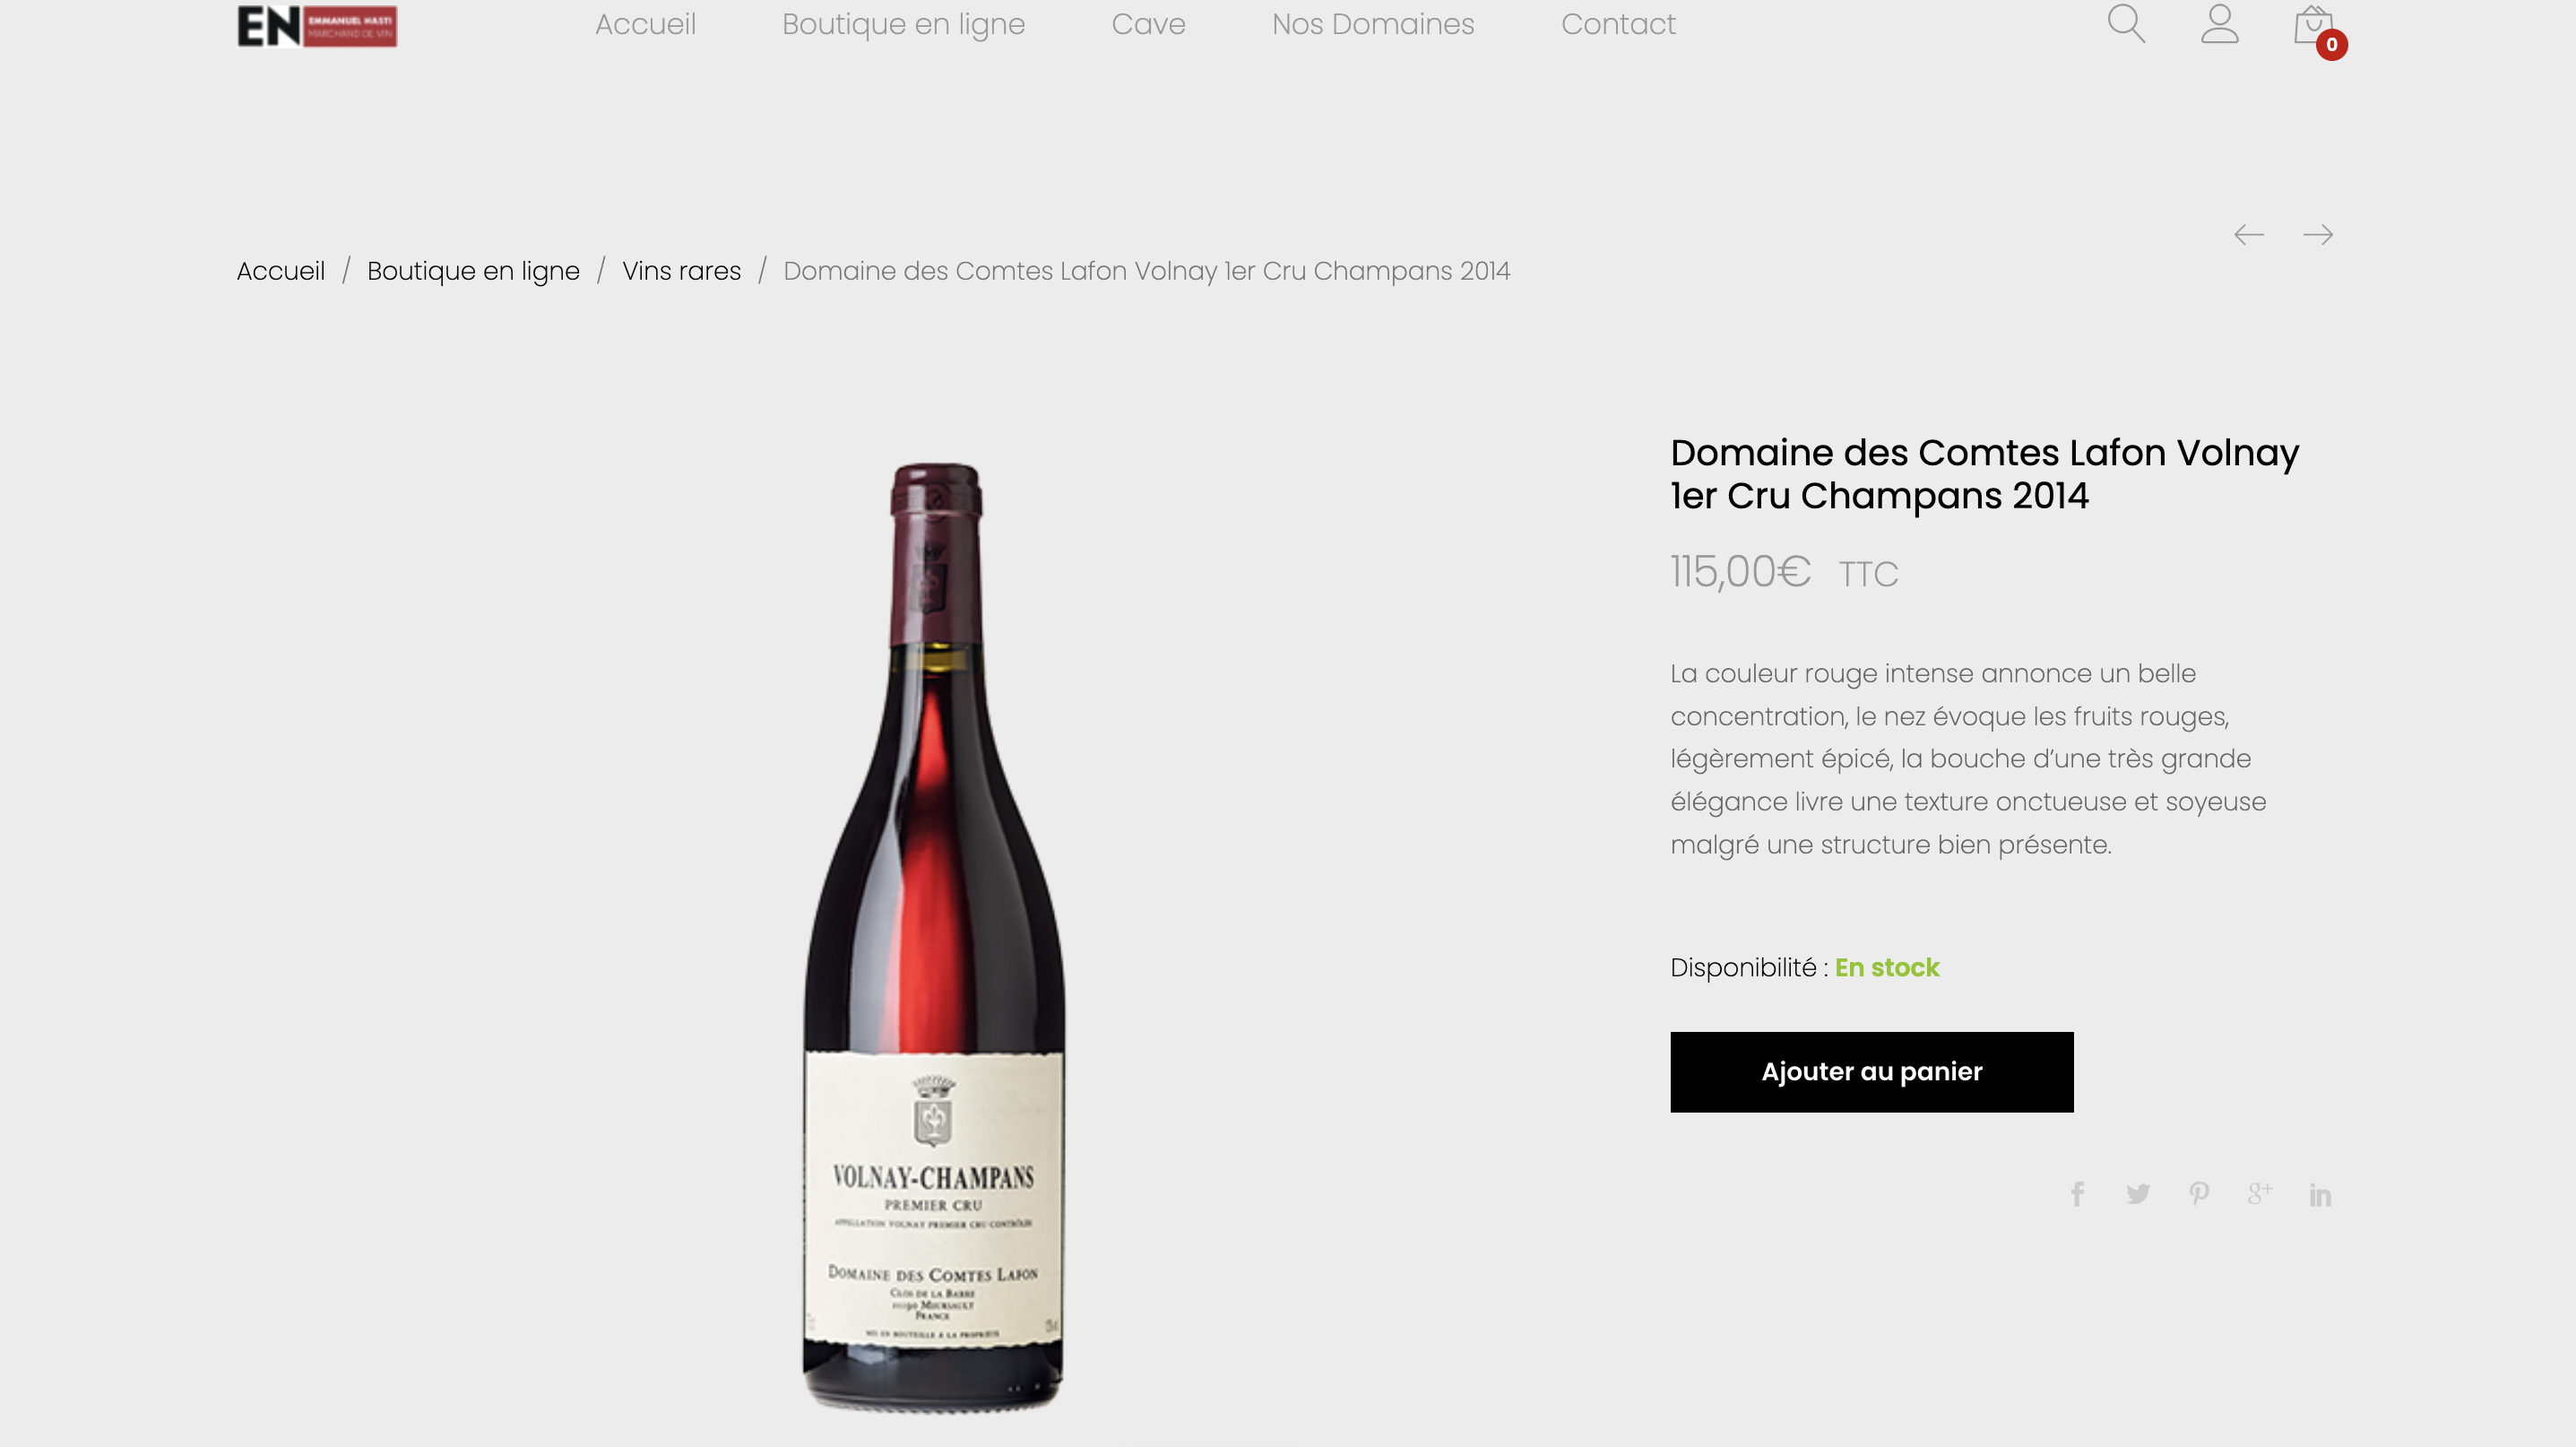

In [ ]:
(df_merge.loc[df_merge['price']==225])

,product_id,onsale_web,price,stock_quantity,id_web,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_scores
310,4352,1,225.0,0,15940,0.0,5.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",7.191457


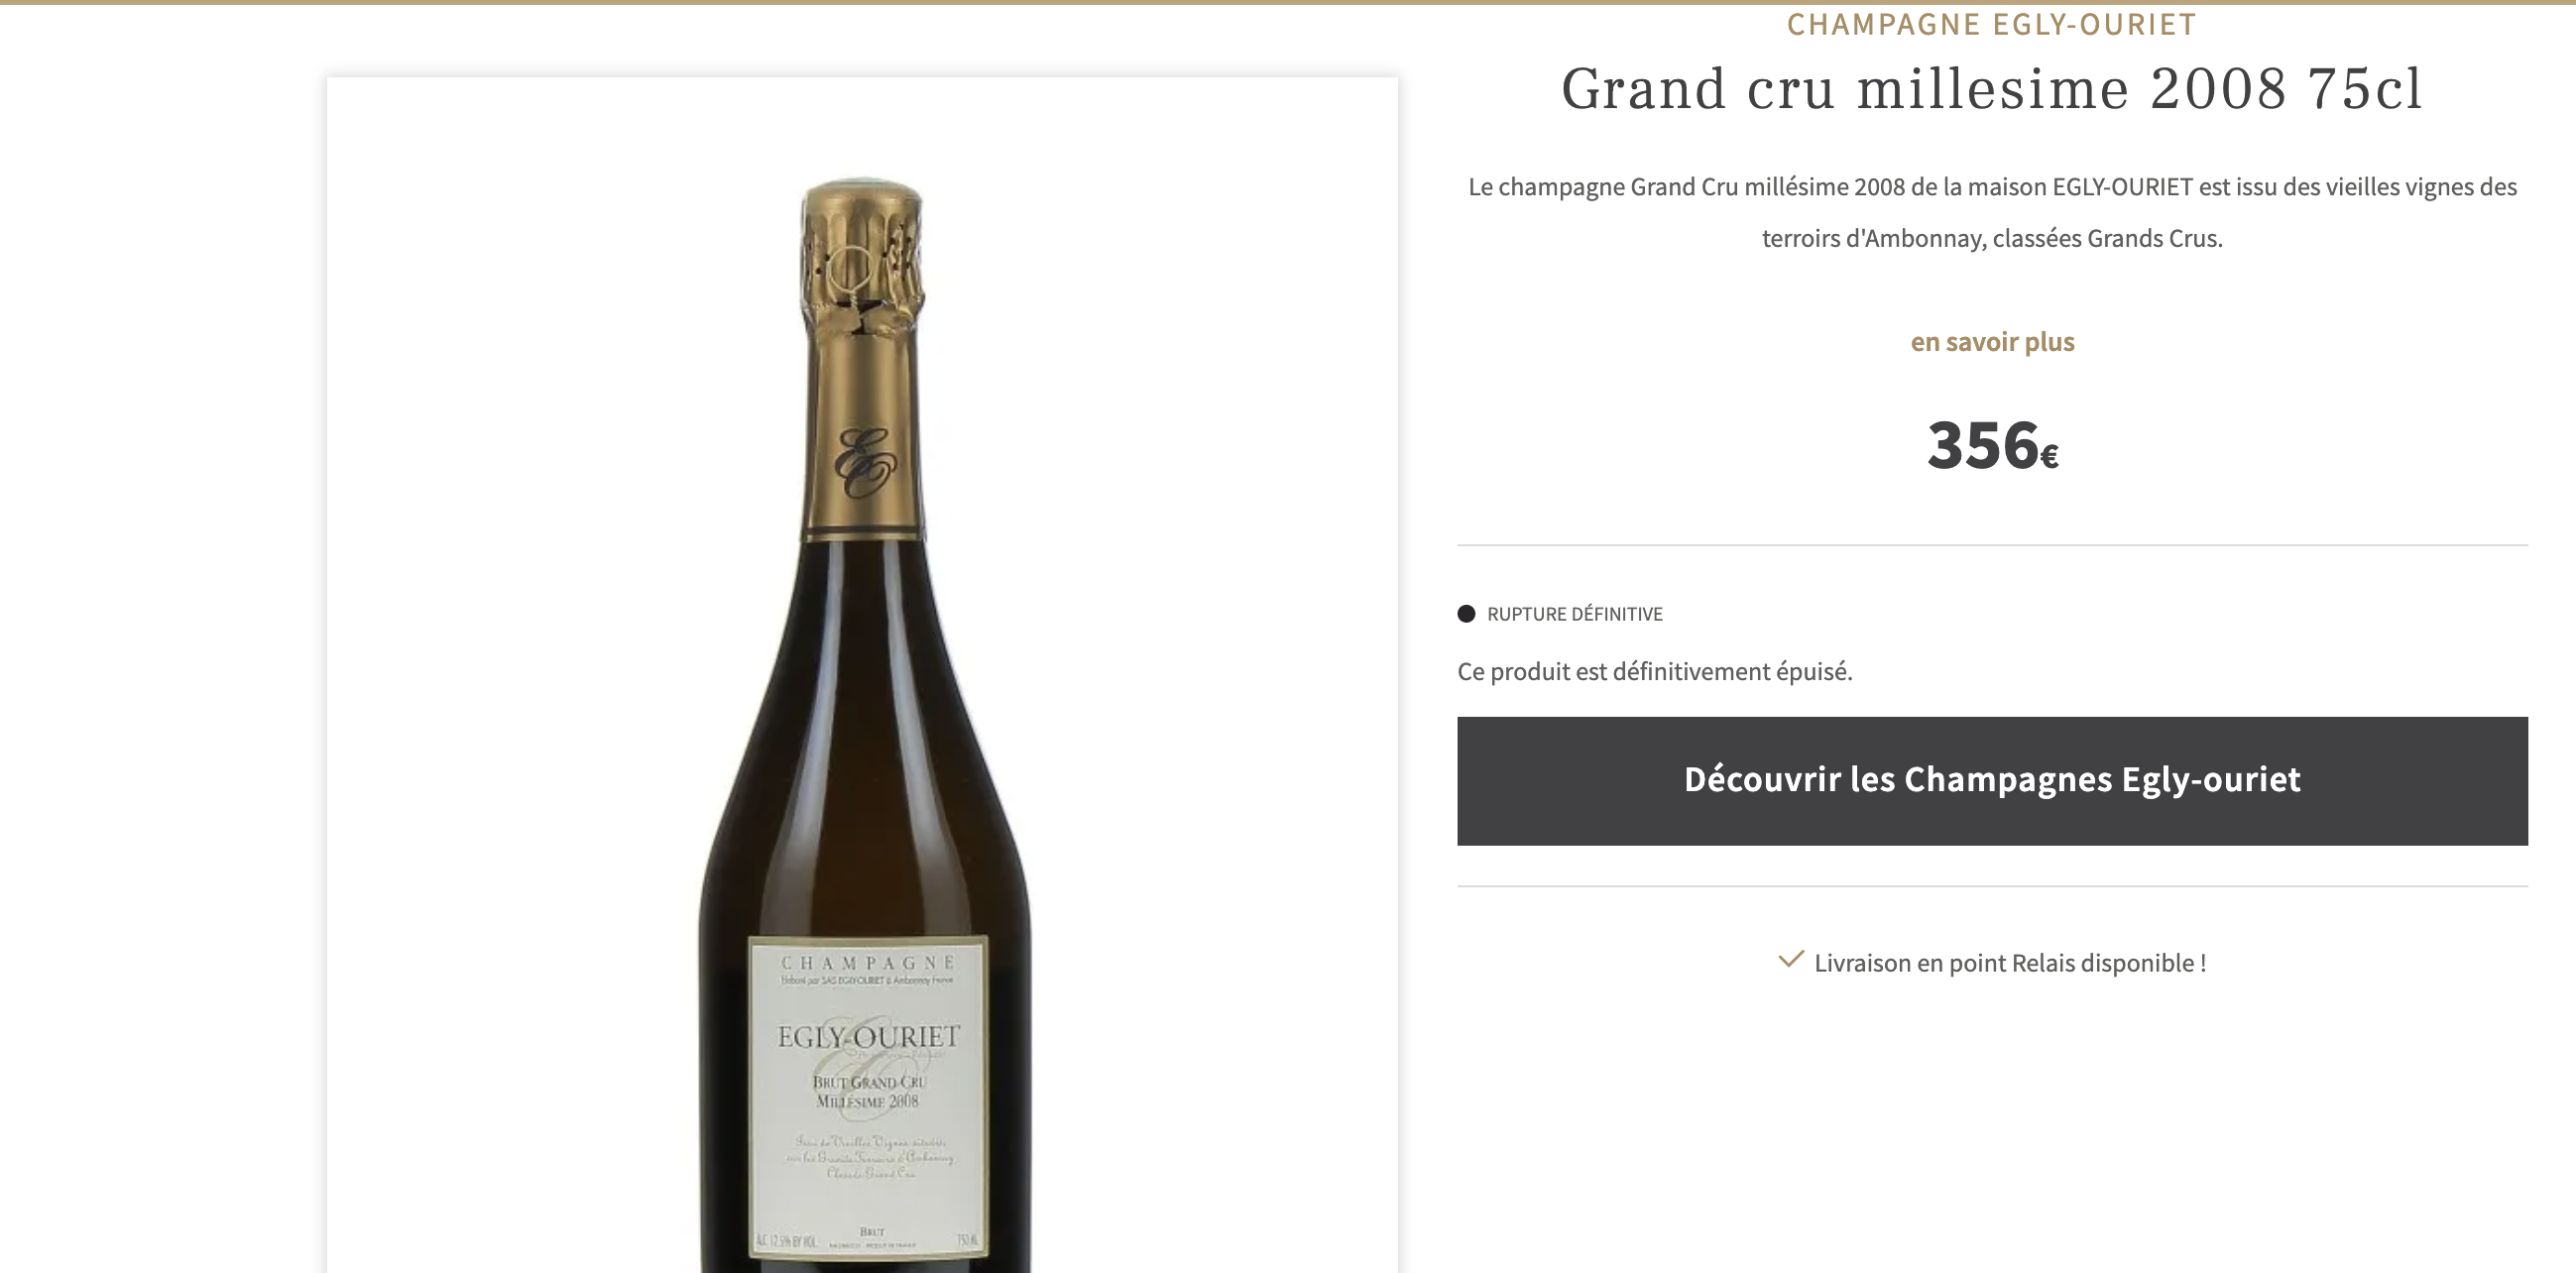

les outliers sont justifiables de part l'hétérogénéité du marché du vin.
les prix chez les sites concurrents sont équivalents aux prix que l'on propose voire supérieurs.les prix des bouteilles de vins à haute qualité varie beaucoup du fait que le produit est à quantité réduite.

#<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################
#Créez une colonne calculant le CA par article
df_merge['ca_par_article']=df_merge['price']*df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
display(df_merge.head())

,product_id,onsale_web,price,stock_quantity,id_web,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_scores,ca_par_article
0,3847,1,24.2,0,15298,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.306787,145.2
1,3849,1,34.3,0,15296,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.070366,0.0
2,3850,1,20.8,0,15300,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille",-0.433749,0.0
3,4032,1,14.1,0,19814,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.683940,42.3
4,4039,1,46.0,0,19815,0.0,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge",0.507265,0.0


In [ ]:
###############################
# Palmares des articles en CA #
###############################
#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values(by='ca_par_article', ascending=False,inplace= True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
print(df_merge[['product_id','ca_par_article']].head(20))

    product_id  ca_par_article
0         4334          4704.0
1         4144          4263.0
2         4402          2288.0
3         4142          1590.0
4         4141          1560.0
5         4355          1391.5
6         4352          1125.0
7         4153          1044.0
8         6206          1033.2
9         4068          1029.2
10        4053          1018.9
11        4596          1009.7
12        4891          1004.4
13        5067           958.4
14        6207           932.4
15        4918           892.8
16        5922           824.5
17        4054           716.0
18        4286           698.0
19        4904           685.0


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
df_temp=df_merge[['product_id','ca_par_article']]
df_temp['product_id']=df_temp['product_id'].astype(str)
df_temp.sort_values(by='ca_par_article', ascending=False,inplace= True)

graphique_ca = px.bar(df_temp[['product_id', 'ca_par_article']].head(20), x="product_id", y="ca_par_article")
graphique_ca.update_layout(title="Top 20 Articles par CA")
graphique_ca.show()

del df_temp

In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################
#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge['part_du_ca']=df_merge['ca_par_article']/df_merge['ca_par_article'].sum()

In [ ]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

part_du_CA_triées=df_merge['part_du_ca'].sort_values(ascending=True)
nombres_individus=df_merge['id_web'].nunique()
nombres_individus_1=int(nombres_individus/5)
premier_quintile_CA=part_du_CA_triées[:nombres_individus_1].sum()
second_quintile_CA=part_du_CA_triées[:(nombres_individus_1*2)].sum()
troisième_quintile_CA=part_du_CA_triées[:(nombres_individus_1*3)].sum()
quatrième_quintile_CA=part_du_CA_triées[:(nombres_individus_1*4)].sum()
cinquième_quintile_CA=part_du_CA_triées[:nombres_individus].sum()
print(quatrième_quintile_CA)

0.20897396292402


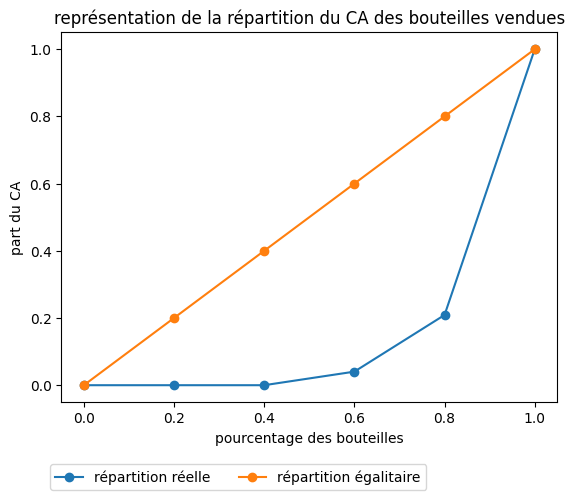

In [ ]:
quintile_CA=[0,premier_quintile_CA,second_quintile_CA,troisième_quintile_CA,quatrième_quintile_CA,cinquième_quintile_CA]
x=[0,.2,.4,.6,.8,1.0]
plt.plot(x,quintile_CA,'o-')
plt.plot(x,x,'o-')
plt.xlabel('pourcentage des bouteilles')
plt.ylabel('part du CA')
plt.legend(['répartition réelle','répartition égalitaire'],bbox_to_anchor=(0.75,-0.15),ncol=2)
plt.title('représentation de la répartition du CA des bouteilles vendues')
plt.show()

In [ ]:
dernier_quintile_CA=round((cinquième_quintile_CA-quatrième_quintile_CA)*100,2)
print("En l'espèce,les 20% des bouteilles les plus vendus sont la source de",dernier_quintile_CA,"% du chiffres d'affaires total du site internet.")

En l'espèce,les 20% des bouteilles les plus vendus sont la source de 79.1 % du chiffres d'affaires total du site internet.


##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [ ]:
df_merge.head(20)

,product_id,onsale_web,price,stock_quantity,id_web,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_scores,ca_par_article,part_du_ca
0,4334,1,49.0,0,07818,0.0,96.0,taxable,2.0,2018-03-01 14:02:44,2018-03-01 13:02:44,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,publish,closed,closed,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Gosset,Champagne,Blanc,Chardonnay,NaN,4 ans,75cl,12%,10°C,"Apéritif, Coquilles Saint Jacques, Huîtres, Po...",0.619291,4704.0,0.066659
1,4144,1,49.0,11,01662,0.0,87.0,taxable,2.0,2018-02-13 13:17:25,2018-02-13 12:17:25,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",publish,closed,closed,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Gosset,Champagne,Rosé,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons",0.619291,4263.0,0.060409
2,4402,1,176.0,8,03510,0.0,13.0,taxable,2.0,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,publish,closed,closed,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,NaN,NaN,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.361706,2288.0,0.032422
3,4142,1,53.0,8,11641,0.0,30.0,taxable,2.0,2018-02-13 13:08:44,2018-02-13 12:08:44,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",publish,closed,closed,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,2020-08-20 07:30:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Gosset,Champagne,Blanc,"44% Chardonnay, 56% Pinot Noir",2015.0,8-10 ans,75cl,12%,10°C,"Agneau, Apéritif, Fromage de chèvre, Noix de S...",0.768658,1590.0,0.022531
4,4141,1,39.0,1,00304,0.0,40.0,taxable,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",publish,closed,closed,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine",0.245872,1560.0,0.022106
5,4355,1,126.5,2,12589,0.0,11.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.513284,1391.5,0.019718
6,4352,1,225.0,0,15940,0.0,5.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",7.191457,1125.0,0.015942
7,4153,1,29.0,0,16237,0

In [ ]:
###############################
# Palmares des articles en quantité #
###############################
#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values(by='total_sales', ascending=False,inplace= True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
print(df_merge[['product_id','total_sales']].head(20))

    product_id  total_sales
0         4334         96.0
1         4144         87.0
2         4068         62.0
3         4200         46.0
4         4172         43.0
5         4187         42.0
6         6206         41.0
7         4141         40.0
8         4729         38.0
9         6047         38.0
10        6207         37.0
11        4891         36.0
12        4153         36.0
13        4870         33.0
14        4706         32.0
15        4142         30.0
16        4250         30.0
17        4861         29.0
18        4965         26.0
19        4918         24.0


In [ ]:
df_temp=df_merge[['product_id','total_sales']]
df_temp['product_id']=df_temp['product_id'].astype(str)
df_temp.sort_values(by='total_sales', ascending=False,inplace= True)
graphique_ca = px.bar(df_temp[['product_id', 'total_sales']].head(20), x="product_id", y="total_sales")
graphique_ca.update_layout(title="Top 20 Articles par ventes")
graphique_ca.show()

del df_temp

In [ ]:
#############################
# Calculer le 20 / 80 en quantité #
#############################
#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge['part_des_ventes']=df_merge['total_sales']/df_merge['total_sales'].sum()
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

In [ ]:
part_des_ventes_triées=df_merge['part_des_ventes'].sort_values(ascending=True)
premier_quintile_ventes=part_des_ventes_triées[:165].sum()
second_quintile_ventes=part_des_ventes_triées[:330].sum()
troisième_quintile_ventes=part_des_ventes_triées[:495].sum()
quatrième_quintile_ventes=part_des_ventes_triées[:660].sum()
cinquième_quintile_ventes=part_des_ventes_triées[:nombres_individus].sum()

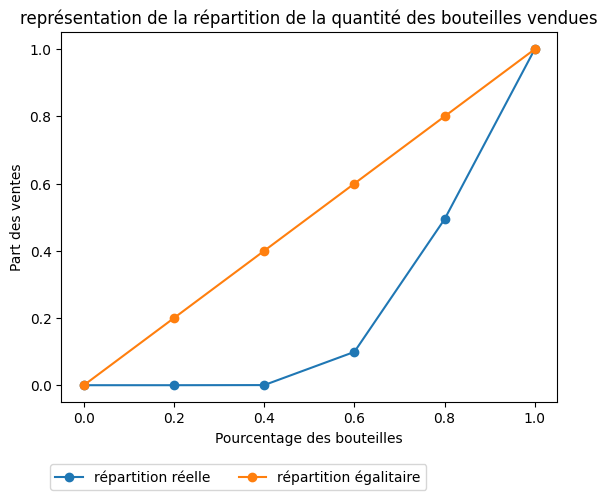

In [ ]:
quintile_ventes=[0,premier_quintile_ventes,second_quintile_ventes,troisième_quintile_ventes,quatrième_quintile_ventes,cinquième_quintile_ventes]
plt.plot(x,quintile_ventes,'o-')
plt.plot(x,x,'o-')
plt.xlabel('Pourcentage des bouteilles')
plt.ylabel('Part des ventes')
plt.legend(['répartition réelle','répartition égalitaire'],bbox_to_anchor=(0.75,-0.15),ncol=2)
plt.title('représentation de la répartition de la quantité des bouteilles vendues')
plt.show()

In [ ]:
dernier_quintile_ventes=round((cinquième_quintile_ventes-quatrième_quintile_ventes)*100,2)
print("En l'espèce,les 20% des types de bouteilles les plus vendus sont la source de",dernier_quintile_ventes,"% de bouteilles total vendus sur le site internet.")

En l'espèce,les 20% des types de bouteilles les plus vendus sont la source de 50.61 % de bouteilles total vendus sur le site internet.


##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse bivarié des prix et des ventes</h3>
</div>

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticker'

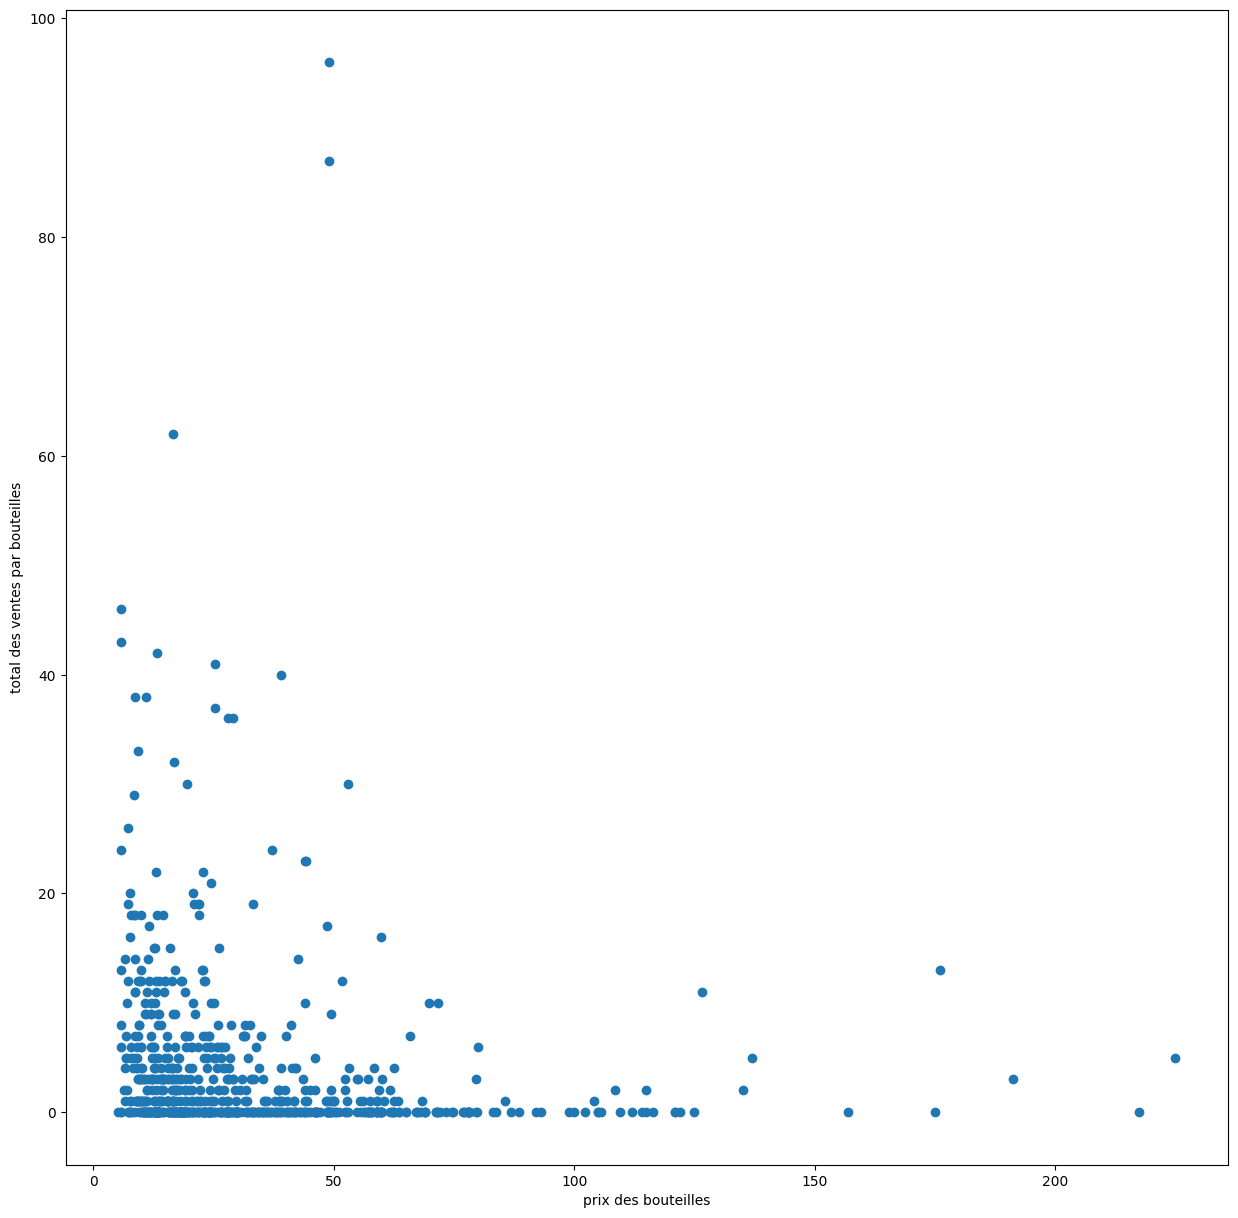

In [ ]:
ventes=df_merge['total_sales']
prix=df_merge['price']
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
plt.scatter(prix,ventes)
plt.xlabel('prix des bouteilles')
plt.ylabel('total des ventes par bouteilles')
formatter = plt.ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
#plt.xticks(np.arange(min(np.datetime64(1)), max(np.datetime64(5)), 1.0))
plt.ylim(prix.min(),prix.max())
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On remarque ainsi qu'un grand nombre de bouteilles à prix raisonnables ne se vendent pas.

##<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Mettre à disposition la nouvelle table sur un fichier Excel<h3>
</div>

In [ ]:
#on vérifie une dernière fois les informations présentes dans le fichier
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               825 non-null    int64         
 1   onsale_web               825 non-null    int64         
 2   price                    825 non-null    float64       
 3   stock_quantity           825 non-null    int64         
 4   id_web                   825 non-null    object        
 5   average_rating           714 non-null    float64       
 6   total_sales              714 non-null    float64       
 7   tax_status               714 non-null    object        
 8   post_author              714 non-null    float64       
 9   post_date                714 non-null    datetime64[ns]
 10  post_date_gmt            714 non-null    datetime64[ns]
 11  post_title               714 non-null    object        
 12  post_excerpt             714 non-nul

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
df_merge.to_excel("Projet_bottleneck.xlsx")